In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
df = pd.read_csv('/content/bank.csv', sep=';')
print(df.shape)
print(df.columns)
print(df.head())


(4521, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199      

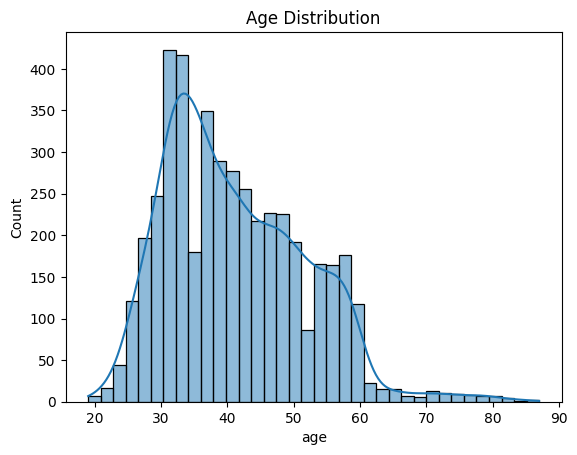

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


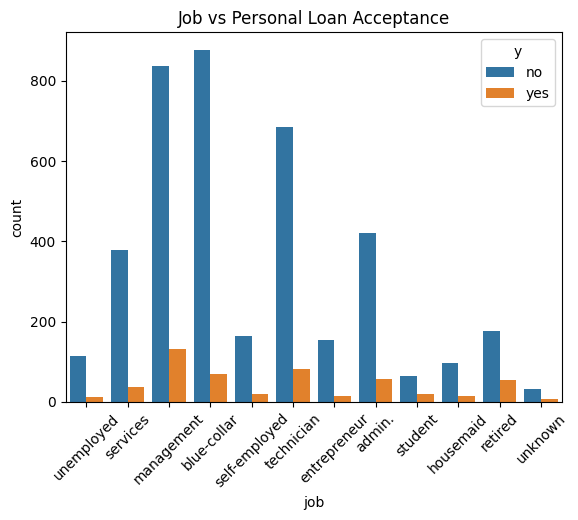

In [ ]:
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Job vs Personal Loan Acceptance')
plt.show()


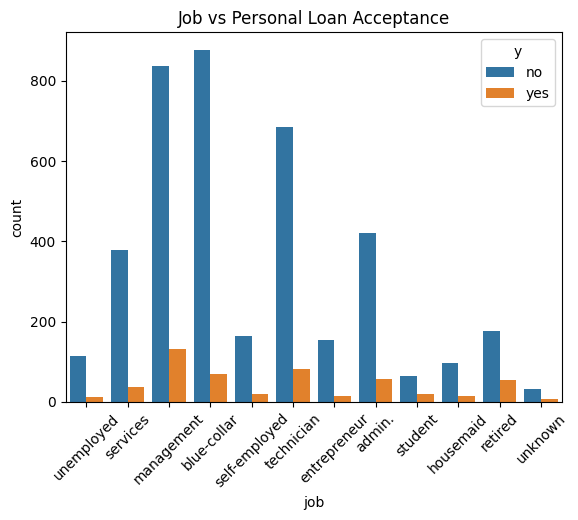

In [ ]:
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Job vs Personal Loan Acceptance')
plt.show()


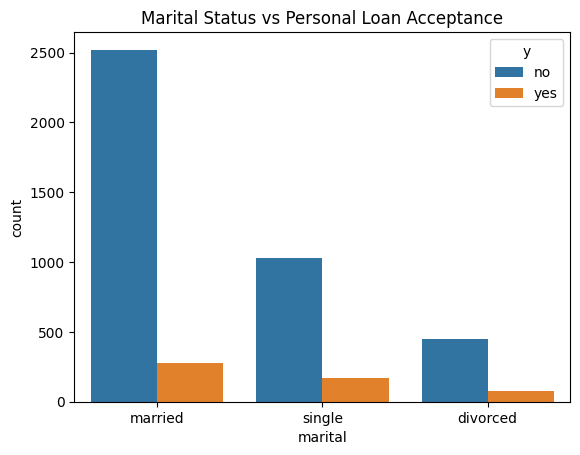

In [ ]:
sns.countplot(x='marital', hue='y', data=df)
plt.title('Marital Status vs Personal Loan Acceptance')
plt.show()


In [ ]:
# Encode target: y ('yes'=1, 'no'=0)
df['y'] = LabelEncoder().fit_transform(df['y'])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)


In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Logistic Regression Accuracy: 0.8972375690607735


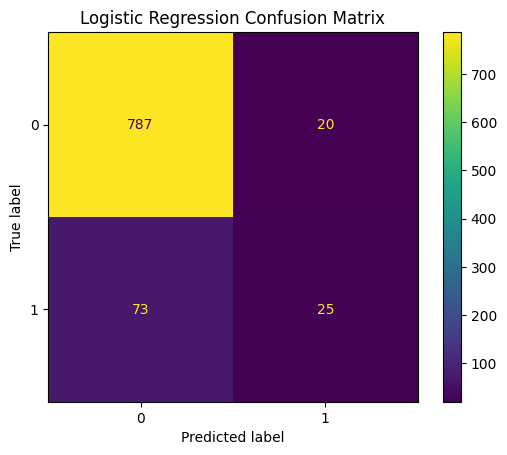

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       807
           1       0.56      0.26      0.35        98

    accuracy                           0.90       905
   macro avg       0.74      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



In [ ]:
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8806629834254144


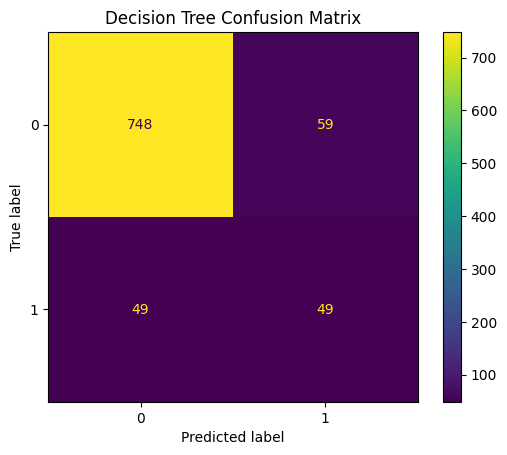

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



In [ ]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))


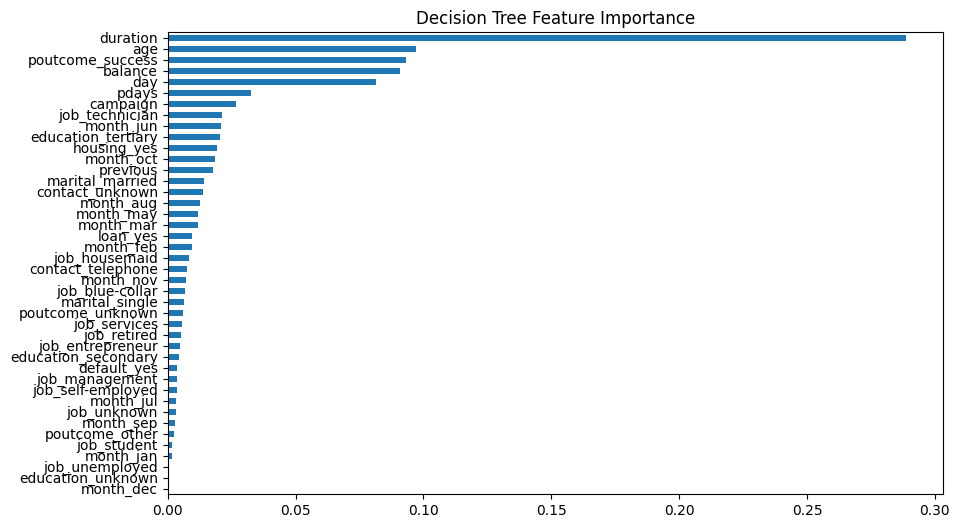

In [ ]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Decision Tree Feature Importance')
plt.show()
